# Summary Statistics: Amazon Best-selling books

In [1]:
# Importing necessary packages
import numpy as np # alias
import pandas as pd # alias

# Importing the data from the CSV
books = pd.read_csv('../amazon_bestsellers.csv')
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [2]:
# let's check the first few rows:
books.head(20)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
5,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,12643,11,2011,Fiction
6,A Game of Thrones / A Clash of Kings / A Storm...,George R. R. Martin,4.7,19735,30,2014,Fiction
7,A Gentleman in Moscow: A Novel,Amor Towles,4.7,19699,15,2017,Fiction
8,"A Higher Loyalty: Truth, Lies, and Leadership",James Comey,4.7,5983,3,2018,Non Fiction
9,A Man Called Ove: A Novel,Fredrik Backman,4.6,23848,8,2016,Fiction


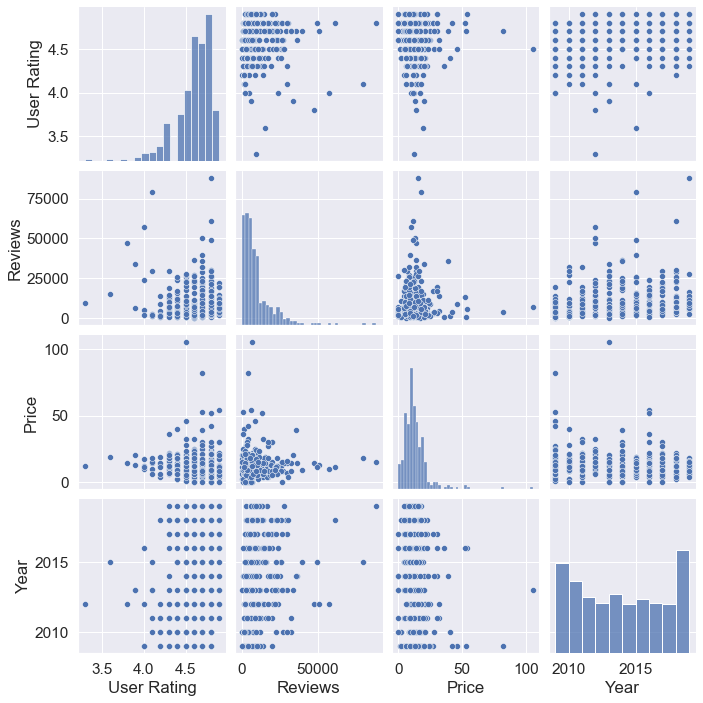

In [9]:
# correlations between numerical variables
import seaborn as sns

sns.pairplot(books)

In [10]:
# finding the correlation matrix
books.corr()

# correlation of +-1 means linear dependency, 0 means no correlation

,User Rating,Reviews,Price,Year
User Rating,1.000000,-0.055595,-0.034787,0.220793
Reviews,-0.055595,1.000000,-0.021519,0.223948
Price,-0.034787,-0.021519,1.000000,-0.133437
Year,0.220793,0.223948,-0.133437,1.000000


<AxesSubplot:ylabel='Frequency'>

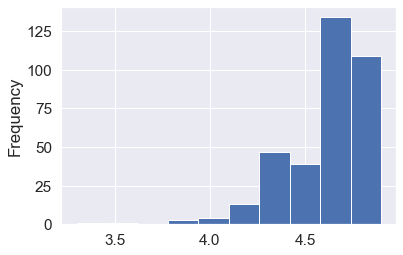

In [8]:
books['User Rating'].plot(kind='hist')

In [4]:
# Do we have any duplicate data? Let's remove books with identical author & title
books = books.drop_duplicates(subset=['Name', 'Author'], keep='first')
books.info() # we lost 199 books!

<class 'pandas.core.frame.DataFrame'>
Int64Index: 351 entries, 0 to 546
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         351 non-null    object 
 1   Author       351 non-null    object 
 2   User Rating  351 non-null    float64
 3   Reviews      351 non-null    int64  
 4   Price        351 non-null    int64  
 5   Year         351 non-null    int64  
 6   Genre        351 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 21.9+ KB


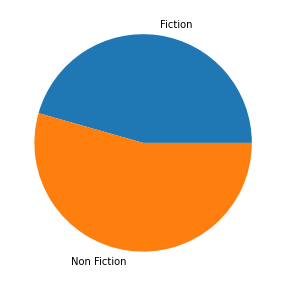

In [5]:
# Let's build a pie-chart of the genre!
from matplotlib import pyplot as plt


genres = ['Fiction', 'Non Fiction']
data = [(books.Genre == 'Fiction').sum(), (books.Genre == 'Non Fiction').sum() ]
# Creating plot
fig = plt.figure(figsize =(5, 5))
plt.pie(data, labels = genres)
# show plot
plt.show()

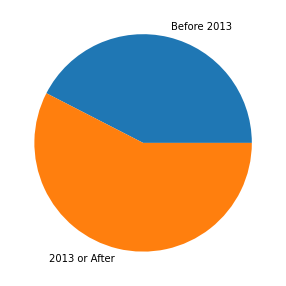

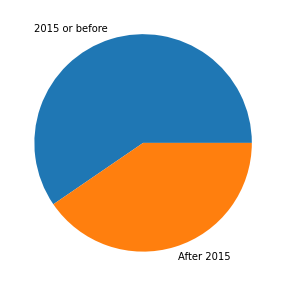

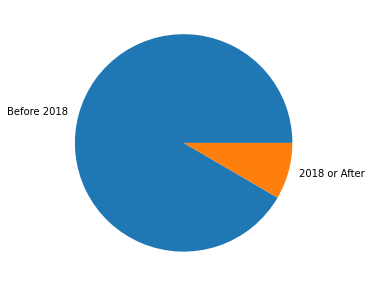

In [6]:
# Are there more books from before or after 2010?
from matplotlib import pyplot as plt


genres = ['Before 2013', '2013 or After']
data = [(books.Year < 2013).sum(), (books.Year >= 2013).sum() ]
# Creating plot
fig = plt.figure(figsize =(5, 5))
plt.pie(data, labels = genres)
# show plot
plt.show()

genres = ['2015 or before', 'After 2015']
data = [(books.Year < 2015).sum(), (books.Year >= 2015).sum() ]
# Creating plot
fig = plt.figure(figsize =(5, 5))
plt.pie(data, labels = genres)
# show plot
plt.show()

genres = ['Before 2018', '2018 or After']
data = [(books.Year < 2018).sum(), (books.Year >= 2019).sum() ]
# Creating plot
fig = plt.figure(figsize =(5, 5))
plt.pie(data, labels = genres)
# show plot
plt.show()

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.set(font_scale=1.4)

# black magic to get the x-axis sorted
years = books['Year'].astype(int).value_counts()
years.reindex(np.intersect1d(order, years.index)).plot(kind='bar', figsize=(7, 6), rot=0)

# design of bar chart
plt.xlabel("Year", labelpad=14)
plt.ylabel("Number of Best Selling Books", labelpad=14)
plt.title("Count of Amazon Bestsellers per Year, 2009-2019", y=1.02);

NameError: name 'order' is not defined

In [ ]:
# User Rating Statistics
print('Average Rating:', books['User Rating'].mean())
print('Median Rating:', books['User Rating'].median())
print('Highest Rating:', books['User Rating'].max())
print('Lowest Rating:', books['User Rating'].min())

In [ ]:
books['User Rating'].describe()

In [ ]:
# What is the average rating of books per year?
books[["Year", "User Rating"]].groupby("Year").describe()

# Interpretations:
# 1) The more readers, the more bad reviews?
# 2) More recent book => Newer Generation => More keen to give a good review?
# 3) Are more recent books simply better? (unlikely)

In [ ]:
# Plotting mean review for each year
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.DataFrame({'Years':[i for i in range(2009, 2020)], 'MeanReview':[4.58, 4.56, 4.53, 4.48, 4.58, 4.64, 4.62, 4.69, 4.65, 4.64, 4.72]})
ax = df.plot.bar(x='Years', y='MeanReview', rot=0, figsize=(10,10))
ax.set_ylim(4,5)

In [ ]:
books[["Year", "User Rating"]].groupby("Year").mean().plot

In [ ]:
books['Author'].value_counts()

In [ ]:
# Let's count how many times each author appears
books['Author'].value_counts()

In [ ]:
# Which authors have more than one of their books as bestsellers?
multiple_authors = books[books.groupby('Author')['Author'].transform('size') >= 2]
multiple_authors['Author'].value_counts()

In [ ]:
# Let's count the most frequent words in the titles!
occurences = {}

for string in books['Name']:
    words = string.split()
    for word in words:
        occurences[word.lower()] = occurences.get(word.lower(), 0) + 1

useless_words = ['the', 'and', 'for', 'that', 'you', 'your', 'how', 'who', 'book', 'novel', 'with', 'from', 'what']
frequent_words = {k: v for k, v in occurences.items() if v > 1 and len(k) >= 3 and k not in useless_words}
sorted(((v, k) for k, v in frequent_words.items()), reverse=True)